# Data Wrangling - Boston Neighborhoods

Thibault Dody 08/15/2017

The purpose of this notebook is to describe the process used to verify the quality of the Boston neighborhoods dataset. The output of this notebook is a new csv file **Boston_Pop_Cleaned.csv** located in *./Cleaned Data/* folder. The data is dated from 2010.

The data is provided by ZipAtlas (http://zipatlas.com/us/ma/zip-code-comparison/population-density.htm). It was manully copied and pasted into a csv file.

## 1. Process

The first step consists of a visual inspection of the csv file (loaded using excel). This phase is critical as it is used to define how the data will be imported and how the parameters of the import will be defined. Once the data has been imported and investigated, it needs to be cleaned and re-organized. To do so, missing values are either dropped or estimated and unrelevant features are removed from the set.

The file **Boston_Pop.csv** is located in *./Original Data/* folder.

In [1]:
# Import all the python libraries needed for the wrangling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Visual inspection

In [2]:
# Import the data as Pandas dataframe.
fileFullPath = "./Original Data/Boston_Pop.csv"
neighborhoods_raw_df = pd.read_csv(fileFullPath,index_col = [0])

Before diving into the content of the dataframe, the size and data type of the dataset are obtained.

In [3]:
# Dataframe Shape
neighborhoods_raw_df.shape

(31, 10)

In [4]:
# Dataframe Info
neighborhoods_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 1 to 84
Data columns (total 10 columns):
Zip Code             31 non-null int64
Location             31 non-null object
City                 31 non-null object
Population           31 non-null int64
People / Sq. Mile    31 non-null float64
National Rank        31 non-null object
Unnamed: 7           0 non-null float64
Unnamed: 8           0 non-null float64
Unnamed: 9           0 non-null float64
Unnamed: 10          0 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 2.7+ KB


The features presented in the file are defined as:
 - *#*: Index
 - *Zip Code*: Neighborhood zip code
 - *Location*: Neighborhood longitude and latitude
 - *City*: Neighborhood city
 - *Population*: Neighborhood population
 - *People / Sq. Mile*: Neighborhood density
 - *National Rank*: Density national rank
 - *Unnamed: 7*: Blank column
 - *Unnamed: 8*: Blank column
 - *Unnamed: 9*: Blank column
 - *Unnamed: 10*: Blank column

## 3. Feature cleaning

The following choices are applied:
- Delete *Unnamed 7* to *Unnamed 10* since these columns do not contain any data.
- Delete the "City" column since it only contains a single value.
- Delete the *National Rank* column since the data it contains is not relevant for this analysis.

In [5]:
# Defined the feature names to be deleted.
columnNameToDelete = ['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10','City','National Rank']

# Clone the dataset and delete features of the clone.
neighborhoods_df = neighborhoods_raw_df.copy()
neighborhoods_df.drop(columnNameToDelete,inplace=True,axis=1)

neighborhoods_df.shape

(31, 4)

In [6]:
neighborhoods_df.head()

,Zip Code,Location,Population,People / Sq. Mile
#,,,,
1,2113,"42.365170, -71.055363",6401,60728.26
2,2115,"42.337545, -71.106173",25486,30823.24
3,2116,"42.349991, -71.076080",19682,26352.26
4,2215,"42.347053, -71.101985",21963,25125.73
5,2118,"42.337863, -71.070816",22173,20902.06


The last step of the cleaning process consists of renaming the features to be consistent with the rest of the project.

In [7]:
neighborhoods_df.rename(columns={"Zip Code":"zipcode","Population":"population","People / Sq. Mile":"population_density"},
                        inplace=True,index=str)
neighborhoods_df.head()

,zipcode,Location,population,population_density
#,,,,
1,2113,"42.365170, -71.055363",6401,60728.26
2,2115,"42.337545, -71.106173",25486,30823.24
3,2116,"42.349991, -71.076080",19682,26352.26
4,2215,"42.347053, -71.101985",21963,25125.73
5,2118,"42.337863, -71.070816",22173,20902.06


## 4. Data exploration and New features

They are three new features that can be created using the existing data:
 - Logintude and Latitude: By working on the string contains under *Location*, both coordinates can be extracted.
 - Neighborhood area: By combining the *Population* feature and the *People / Sq. Mile*

In [30]:
# Compute the neighborhood area in acres (1 sq. mile = 640 acres)
neighborhoods_df["area_acres"] = neighborhoods_df.population/neighborhoods_df.population_density*640
neighborhoods_df["area_sqmiles"] = neighborhoods_df.population/neighborhoods_df.population_density
neighborhoods_df.head()

,population,population_density,area_acres,Latitude,Longitude,area_sqmiles
zipcode,,,,,,
2108,3446,12377.16,178.186272,42.357554,-71.063913,0.278416
2109,3428,20752.98,105.715902,42.362653,-71.053804,0.165181
2110,1428,8630.93,105.888937,42.357371,-71.053180,0.165451
2111,5138,15967.11,205.943342,42.348784,-71.058988,0.321786
2113,6401,60728.26,67.458544,42.365170,-71.055363,0.105404


In [9]:
neighborhoods_df[['Latitude','Longitude']] = neighborhoods_df.Location.str.extract(r'(.*), (.*)',expand=True)
neighborhoods_df.head()

,zipcode,Location,population,population_density,area_acres,Latitude,Longitude
#,,,,,,,
1,2113,"42.365170, -71.055363",6401,60728.26,67.458544,42.365170,-71.055363
2,2115,"42.337545, -71.106173",25486,30823.24,529.179930,42.337545,-71.106173
3,2116,"42.349991, -71.076080",19682,26352.26,478.003784,42.349991,-71.076080
4,2215,"42.347053, -71.101985",21963,25125.73,559.439268,42.347053,-71.101985
5,2118,"42.337863, -71.070816",22173,20902.06,678.914901,42.337863,-71.070816


In [10]:
# Defined the feature names to be deleted.
columnNameToDelete = ['Location']

neighborhoods_df.drop(columnNameToDelete,inplace=True,axis=1)

neighborhoods_df.shape

(31, 6)

In [11]:
neighborhoods_df.sort_values(by='zipcode',inplace=True)
neighborhoods_df.reset_index(drop=True,inplace=True)
neighborhoods_df.head()

,zipcode,population,population_density,area_acres,Latitude,Longitude
0,2108,3446,12377.16,178.186272,42.357554,-71.063913
1,2109,3428,20752.98,105.715902,42.362653,-71.053804
2,2110,1428,8630.93,105.888937,42.357371,-71.053180
3,2111,5138,15967.11,205.943342,42.348784,-71.058988
4,2113,6401,60728.26,67.458544,42.365170,-71.055363



## 5. Data visualization

Data verification is an essential step of the data wrangling process. When obtaining data from an unknow/uncertified source, it is important to control the quality of the date. To do so, we will plot the center locations of the neighborhoods and an bar plot of the population and population density.

In [12]:
# The folium packages is used
%matplotlib inline
import folium

In [13]:
neighborhood_lst = [[x,y] for x,y in 
                         zip(neighborhoods_df.Latitude.values,neighborhoods_df.Longitude.values)]

map_neighborhood = folium.Map(location=neighborhood_lst[0],zoom_start=11.5)

for loc in neighborhood_lst:
    folium.Marker(location=loc, popup='?',
              icon=folium.Icon(color='red',icon='info-sign',)).add_to(map_neighborhood)

map_neighborhood

The mapping of the neighborhood centers is deemed acceptable.

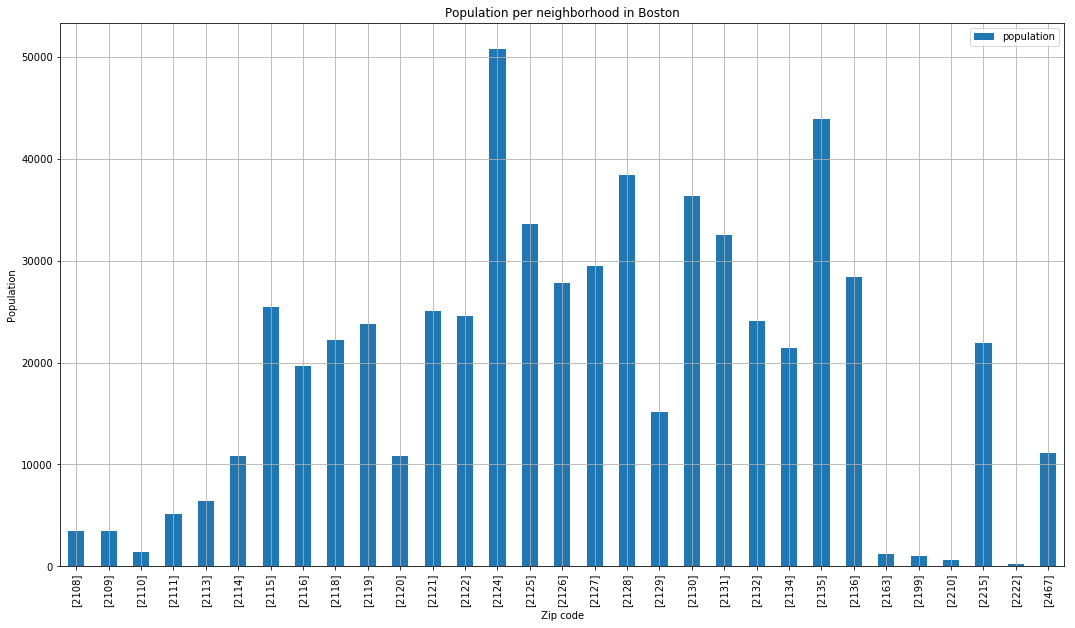

In [14]:
ax = neighborhoods_df[["population"]].plot(kind='bar',
                                      figsize=(18,10),
                                      title="Population per neighborhood in Boston");
ax.set_ylabel("Population")
ax.set_xlabel("Zip code")
ax.grid(True)

ax.set_xticklabels(neighborhoods_df[["zipcode"]].values);
plt.savefig('./Figures/Population.jpg');

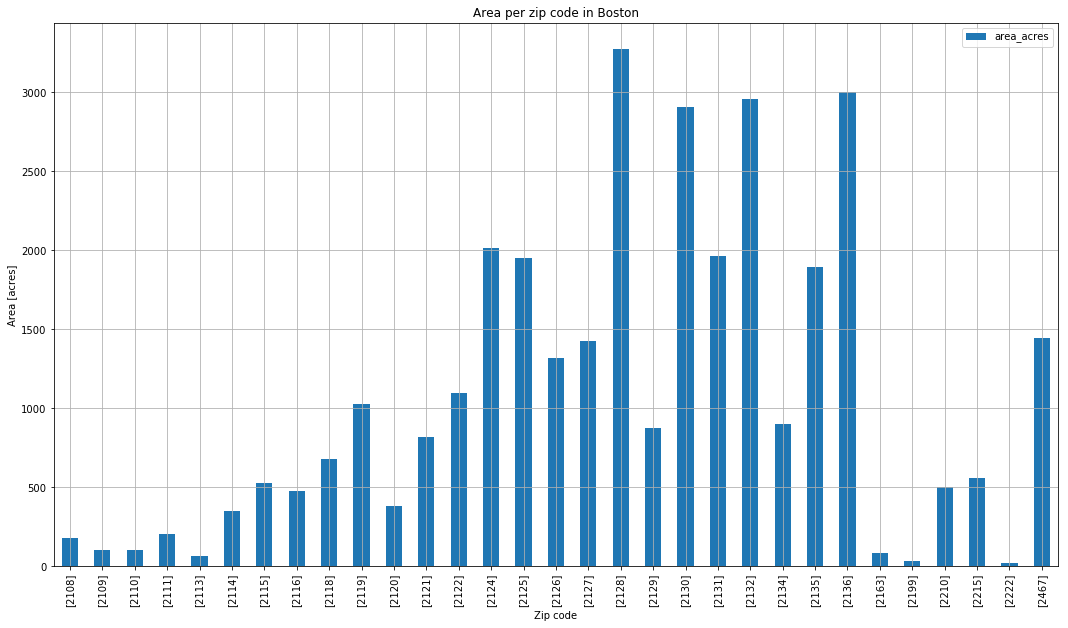

In [15]:
ax = neighborhoods_df[["area_acres"]].plot(kind='bar',
                                      figsize=(18,10),
                                      title="Area per zip code in Boston");
ax.set_ylabel("Area [acres]")
ax.set_xlabel("Zip code")
ax.grid(True)

ax.set_xticklabels(neighborhoods_df[["zipcode"]].values);
plt.savefig('./Figures/Areas.jpg');

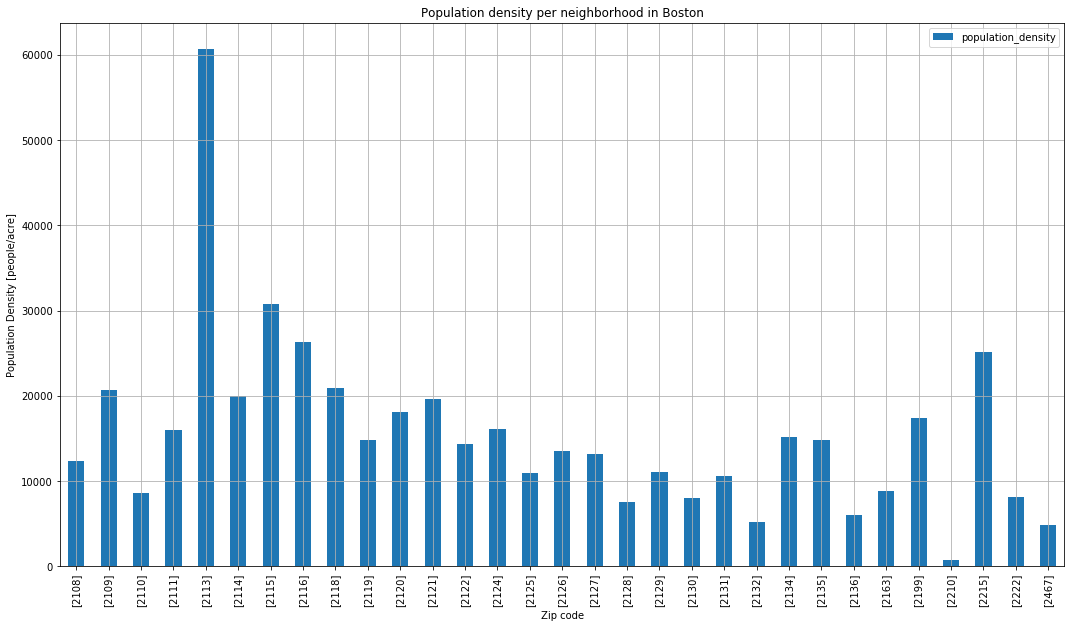

In [16]:
ax = neighborhoods_df[["population_density"]].plot(kind='bar',
                                      figsize=(18,10),
                                      title="Population density per neighborhood in Boston");
ax.set_ylabel("Population Density [people/acre]")
ax.set_xlabel("Zip code")
ax.grid(True)

ax.set_xticklabels(neighborhoods_df[["zipcode"]].values);
plt.savefig('./Figures/Density.jpg')

In [17]:
neighborhood_lst = [[x,y] for x,y in 
                         zip(neighborhoods_df.Latitude.values,neighborhoods_df.Longitude.values)]

zip_map = folium.Map(location=neighborhood_lst[0], zoom_start=11.5)
zipcode_lst = list(neighborhoods_df.zipcode.values)
i=0

for loc in neighborhood_lst:
    folium.Marker(location=loc, popup=str(zipcode_lst[i]),icon=folium.Icon(color='red',icon='info-sign')).add_to(zip_map)
    i+=1

zip_map.choropleth(geo_path='./Original Data/Map per zip/Zip_Codes.json',fill_color='Blue')
zip_map

The zip code areas are plotted using the following information:
 - reshape file from :http://bostonopendata-boston.opendata.arcgis.com/datasets/53ea466a189b4f43b3dfb7b38fa7f3b6_1
 - conversion to json using: http://mapshaper.org/
 - final datasource: *./Original Data/Map per zip/Zip_Codes.json*
 
 While the marker located outside the shaded area could be considered as an outlier, it actually represents the zip 02467 for the Chestnut hill neighborhoods. A particular attention will be paid to the results of this zip code as the available pothole data only contains record located under the Boston juridiction while the population and area of the zip code are valid for the entier zip code.

We also noticed that the zip codes 02114 and 02222 share the same area. Zip code 2222 is a small area, its information will be added to the ones of 02114 so they can later be plotted.

In [18]:
print(neighborhoods_df[neighborhoods_df.zipcode==2114])
print(neighborhoods_df[neighborhoods_df.zipcode==2222])

   zipcode  population  population_density  area_acres   Latitude   Longitude
5     2114       10868            19975.48  348.202897  42.363175  -71.068646
    zipcode  population  population_density  area_acres   Latitude   Longitude
29     2222         246             8179.32   19.248544  42.366470  -71.062494


In [19]:
neighborhoods_df.set_index('zipcode',inplace=True,drop=True)
neighborhoods_df.loc[2114,'population']=neighborhoods_df.loc[2114,'population']+neighborhoods_df.loc[2222,'population']
neighborhoods_df.loc[2114,'area_acres']=neighborhoods_df.loc[2114,'area_acres']+neighborhoods_df.loc[2222,'area_acres']
neighborhoods_df.loc[2114,'population_density'] = neighborhoods_df.loc[2114,'population']/neighborhoods_df.loc[2114,'area_acres']*640

In [20]:
print(neighborhoods_df.loc[2114,:])
print(neighborhoods_df.loc[2222,:])

population                 11114
population_density       19357.6
area_acres               367.451
Latitude               42.363175
Longitude             -71.068646
Name: 2114, dtype: object
population                   246
population_density       8179.32
area_acres               19.2485
Latitude               42.366470
Longitude             -71.062494
Name: 2222, dtype: object


In [22]:
neighborhoods_df.index

Int64Index([2108, 2109, 2110, 2111, 2113, 2114, 2115, 2116, 2118, 2119, 2120,
            2121, 2122, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132,
            2134, 2135, 2136, 2163, 2199, 2210, 2215, 2222, 2467],
           dtype='int64', name='zipcode')

In [23]:
neighborhoods_df.drop(2222,axis=0,inplace=True)
neighborhoods_df.index

Int64Index([2108, 2109, 2110, 2111, 2113, 2114, 2115, 2116, 2118, 2119, 2120,
            2121, 2122, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132,
            2134, 2135, 2136, 2163, 2199, 2210, 2215, 2467],
           dtype='int64', name='zipcode')

# 6. Chestnut Hill

As shown above, the Chestnut Hill neighborhood (zip: 02467) does not entirely belong to the city of Boston. In order to produce results that are only representative of the fraction of the area included within the boundaries of the city, the following transformations are applied:
1. Extract the area of the neighborhood from the json file
2. Assign the obtained value to the area of Chestnut Hill
3. Scale the population down assuming an homogenous distribution over the entiere zip area.

In [31]:
# Store the existing population size and area
old_population = neighborhoods_df.loc[2467,'population']
old_area = neighborhoods_df.loc[2467,'area_acres']

In [37]:
import json
from pandas.io.json import json_normalize

geo_file_df = pd.read_json('./Original Data/Map per zip/Zip_Codes.json')
geo_file_df.head()
# Extract the area from the json file
# The area located in the json file is expressed in square-feet
#geo_file_df = pd.read_json(./Original Data/Map per zip/Zip_Codes.json)

,features,type
0,"{'type': 'Feature', 'geometry': {'type': 'Poly...",FeatureCollection
1,"{'type': 'Feature', 'geometry': {'type': 'Poly...",FeatureCollection
2,"{'type': 'Feature', 'geometry': {'type': 'Poly...",FeatureCollection
3,"{'type': 'Feature', 'geometry': {'type': 'Poly...",FeatureCollection
4,"{'type': 'Feature', 'geometry': {'type': 'Poly...",FeatureCollection


In [67]:
# Sum the area of all the polygons whose zip codes are 02467

chestnutHill_area = 0
for feature in geo_file_df.features:
    if feature['properties']['ZIP5']=='02467':
        chestnutHill_area+=feature['properties']['ShapeSTAre']

# Convert area into square-mile
chestnutHill_area = chestnutHill_area*3.587006e-8
        
print("Chestnut Hill area:",chestnutHill_area,"square-mile")

Chestnut Hill area: 0.62389912805824 square-mile


In [71]:
# Set new properties for the Chestnut Hill Neighborhood
neighborhoods_df.loc[2467,'area_acres'] = chestnutHill_area
neighborhoods_df.loc[2467,'population'] = neighborhoods_df.loc[2467,'area_acres']*neighborhoods_df.loc[2467,'population_density']


In [69]:
neighborhoods_df.loc[2467,:]

population               3054.85
population_density       4896.38
area_acres              0.623899
Latitude               42.322089
Longitude             -71.172760
area_sqmiles             2.26249
Name: 2467, dtype: object

## 7. Output cleaned data

The following file will be re-used as part of the potholes analysis.

In [70]:
neighborhoods_df.to_csv("./Cleaned Data/Boston_Pop_Cleaned.csv")